# First let's import the data

In [1]:
import pandas as pd 
df_universalis = pd.read_csv("/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/Données/data_universalis.csv",
index_col=0)

In [2]:
import joblib

df_wiki = joblib.load("/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/Notebooks/data/df_wiki.joblib")

In [3]:
from tqdm import tqdm 

df_wiki = pd.DataFrame([df.mean(0) for df in tqdm(df_wiki)])

100%|██████████| 1841/1841 [00:01<00:00, 969.64it/s] 


In [4]:
df_wiki.columns = [x if not "POS" in x else x.split("POS -")[1] for x in df_wiki.columns]

In [5]:
df_wiki.head()

,div_mot,div_tok,DET,NOUN,PROPN,NUM,VERB,AUX,ADJ,X,...,VerbForm : ['Part'],VerbForm : ['Fin'],VerbForm : ['Inf'],Voice : [],Voice : ['Pass'],SYM,Person : ['2'],DEP - expl:pass,INTJ,Mood : ['Imp']
0,0.866459,0.846069,0.012018,0.296481,0.208973,0.104839,0.133966,0.046426,0.067150,0.034007,...,0.044655,0.111322,0.024415,0.988994,0.011006,NaN,NaN,NaN,NaN,NaN
1,0.859327,0.833423,0.012053,0.321641,0.176111,0.069797,0.157402,0.054866,0.075733,0.026623,...,0.053967,0.130239,0.028063,0.988667,0.011333,0.002339,0.000360,NaN,NaN,NaN
2,0.887324,0.860812,0.009114,0.343552,0.165700,0.041425,0.177299,0.054957,0.083126,0.023198,...,0.066280,0.125932,0.040044,0.979840,0.020160,NaN,0.002209,0.000552,NaN,NaN
3,0.877207,0.851357,0.005612,0.363941,0.165655,0.036281,0.171275,0.051785,0.109599,0.015745,...,0.062175,0.133736,0.027149,0.987766,0.012234,NaN,0.000168,NaN,0.000335,NaN
4,0.898080,0.879907,0.004304,0.320872,0.145440,0.040869,0.173437,0.044955,0.101783,0.065519,...,0.059302,0.130396,0.028694,0.988044,0.011956,0.001435,0.000478,NaN,NaN,NaN


In [6]:
df_universalis.fillna(0, inplace=True)
df_wiki.fillna(0, inplace=True)

In [32]:
from src.stats.visualisation import effect_size_distribution
columns = [x for x in df_wiki.columns if x in df_universalis.columns]
df_wiki = df_wiki.loc[:,columns]
df_universalis = df_universalis.loc[:,columns]

for sub_cat in ["Tense","Gender","Number","Mood","VerbForm"]:
    current_cols = [x for x in columns if ((sub_cat in x) and (not "[]" in x))]
    row_sums = df_wiki.loc[:,current_cols].sum(axis=1)
    # Divide each cell by its row sum
    df_wiki.loc[:,current_cols] = df_wiki.loc[:,current_cols].div(row_sums, axis=0)

    row_sums = df_universalis.loc[:,current_cols].sum(axis=1)
    # Divide each cell by its row sum
    df_universalis.loc[:,current_cols] = df_universalis.loc[:,current_cols].div(row_sums, axis=0)
    #df_wiki.loc[:,[x for x in columns if sub_cat in x]] = df_wiki.loc[:,[x for x in columns if sub_cat in x]]/df_wiki.loc[:,[x for x in columns if sub_cat in x]] 
#effect_size_distribution(df_wiki.to_numpy()[:,:],
#                         df_universalis.to_numpy()[:,:],
#                         columns=columns[:])

columns = [x for x in df_wiki.columns if ((not '[]' in x) or ("Voice" in x ))]
df_wiki = df_wiki.loc[:,columns]
df_universalis = df_universalis.loc[:,columns]

In [27]:
result

,VerbForm : ['Part'],VerbForm : ['Fin'],VerbForm : ['Inf']
0,0.247546,0.617111,0.135344
1,0.254237,0.613559,0.132203
2,0.285375,0.542212,0.172414
3,0.278738,0.599549,0.121713
4,0.271539,0.597072,0.131390
...,...,...,...
1836,0.236016,0.603683,0.160300
1837,0.234675,0.574408,0.190918
1838,0.275549,0.596770,0.127681
1839,0.235900,0.648003,0.116097


  0%|          | 0/37 [00:00<?, ?it/s]/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36675.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 37/37 [00:04<00:00,  8.29it/s]


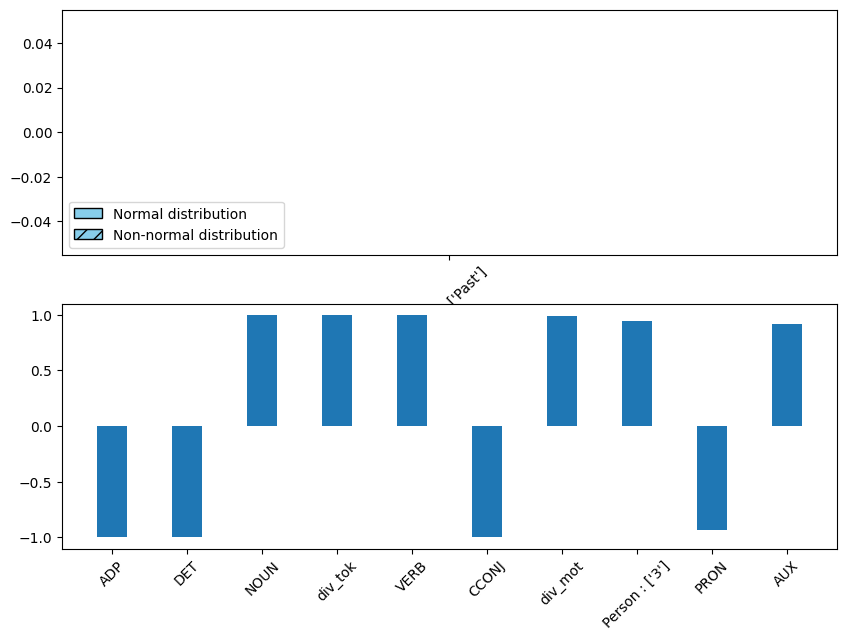

In [33]:
(columns, delta, D, normality) = effect_size_distribution(df_wiki.to_numpy()[:,:],
                                        df_universalis.to_numpy()[:,:],
                                         columns=columns[:],
                                         path_figure="images/superiority.png")

In [34]:
[(c,delta[e]) for e,c in enumerate(columns) if delta[e][1] == -1]

[('DET', (np.float64(-0.9997753806632017), -1)),
 ('ADP', (np.float64(-0.9999433341960576), -1)),
 ('PRON', (np.float64(-0.9356594749526705), -1)),
 ('SCONJ', (np.float64(-0.5261882730962952), -1)),
 ('CCONJ', (np.float64(-0.9945050165750439), -1)),
 ("Tense : ['Past']", (np.float64(-0.3302006592990754), -1)),
 ("Tense : ['Fut']", (np.float64(-0.15216160565947126), -1)),
 ("Tense : ['Imp']", (np.float64(-0.034552870002262336), -1)),
 ("Mood : ['Ind']", (np.float64(-0.228386753738873), -1)),
 ("Gender : ['Fem']", (np.float64(-0.07201084736926487), -1)),
 ("Number : ['Sing']", (np.float64(-0.19324375071045158), -1)),
 ("VerbForm : ['Part']", (np.float64(-0.20600229492062752), -1)),
 ("VerbForm : ['Inf']", (np.float64(-0.11266013439985308), -1)),
 ('Voice : []', (np.float64(-0.799879040872766), -1))]

In [35]:
[(c,delta[e]) for e,c in enumerate(columns) if delta[e][1] == 1]

[('div_mot', (np.float64(0.990756646216769), 1)),
 ('div_tok', (np.float64(0.9956581790149169), 1)),
 ('NOUN', (np.float64(0.9996761636687924), 1)),
 ('PROPN', (np.float64(0.7346119573584642), 1)),
 ('NUM', (np.float64(0.7096047426878563), 1)),
 ('VERB', (np.float64(0.9953512417120153), 1)),
 ('AUX', (np.float64(0.918692080376281), 1)),
 ('ADJ', (np.float64(0.8889576402380527), 1)),
 ('X', (np.float64(0.6639892740786161), 1)),
 ('ADV', (np.float64(0.722959862586166), 1)),
 ("Tense : ['Pres']", (np.float64(0.448621259229391), 1)),
 ("Person : ['3']", (np.float64(0.947784890624705), 1)),
 ("Person : ['1']", (np.float64(0.340079570578066), 1)),
 ("Mood : ['Cnd']", (np.float64(0.4003706381975061), 1)),
 ("Mood : ['Sub']", (np.float64(0.3137879705133432), 1)),
 ("Gender : ['Masc']", (np.float64(0.07201084736926487), 1)),
 ("Number : ['Plur']", (np.float64(0.19324395806049216), 1)),
 ("VerbForm : ['Fin']", (np.float64(0.3503131541014393), 1)),
 ("Voice : ['Pass']", (np.float64(0.799878226283

In [37]:
D

[(np.float64(4.191688485926878), 1),
 (np.float64(5.069354543873472), 1),
 (np.float64(-5.39368117319873), -1),
 (np.float64(6.676095564540753), 1),
 (np.float64(1.3881695455186216), 1),
 (np.float64(1.4338204284235003), 1),
 (np.float64(5.248359312487355), 1),
 (np.float64(2.606801873401743), 1),
 (np.float64(2.3205381262442084), 1),
 (np.float64(1.0457751494453407), 1),
 (np.float64(-5.639433187385024), -1),
 (np.float64(1.4198408855031286), 1),
 (np.float64(-1.8302482710270225), -1),
 (np.float64(-0.7938390205053126), -1),
 (np.float64(-2.803442220244342), -1),
 (np.float64(nan), -1),
 (np.float64(nan), -1),
 (np.float64(nan), -1),
 (np.float64(nan), -1),
 (np.float64(2.529593002996138), 1),
 (np.float64(0.07262466816190731), 1),
 (np.float64(nan), -1),
 (np.float64(nan), -1),
 (np.float64(nan), -1),
 (np.float64(0.07666860733890687), 1),
 (np.float64(-0.07666860733890489), -1),
 (np.float64(0.22712607885733757), 1),
 (np.float64(-0.22712607885733724), -1),
 (np.float64(nan), -1),
 

In [11]:
columns

['div_mot',
 'div_tok',
 'DET',
 'NOUN',
 'PROPN',
 'NUM',
 'VERB',
 'AUX',
 'ADJ',
 'X',
 'ADP',
 'ADV',
 'PRON',
 'SCONJ',
 'CCONJ',
 'Tense : []',
 "Tense : ['Past']",
 "Tense : ['Pres']",
 "Tense : ['Fut']",
 "Tense : ['Imp']",
 'Person : []',
 "Person : ['3']",
 "Person : ['1']",
 'Mood : []',
 "Mood : ['Ind']",
 "Mood : ['Cnd']",
 "Mood : ['Sub']",
 'Gender : []',
 "Gender : ['Masc']",
 "Gender : ['Fem']",
 'Number : []',
 "Number : ['Plur']",
 "Number : ['Sing']",
 'VerbForm : []',
 "VerbForm : ['Part']",
 "VerbForm : ['Fin']",
 "VerbForm : ['Inf']",
 'Voice : []',
 "Voice : ['Pass']",
 'SYM',
 "Person : ['2']",
 'INTJ',
 "Mood : ['Imp']"]

In [36]:
normality

[True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False]